股票日成交資訊
台灣證券交易所-個股日成交資訊：
https://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY.html

In [5]:
import time
import requests
import pandas as pd
import sqlite3

def get_daily_prices(date):
    
    url = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY'

    payloads = {
        'response': 'html',
        'date': date,
        'stockNo': 1101
    }

    headers = {
        'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'
    }

    response = requests.get(url, headers=headers, params=payloads)
    
    df = pd.read_html(response.text)[0]
    df.columns = df.columns.droplevel(0)
    df['日期'] = df['日期'].apply(lambda date: '{}/{}'.format(int(date.split('/', 1)[0]) + 1911, date.split('/', 1)[1]))
#     df.set_index('日期', inplace=True)
    
    time.sleep(5)
    
    return df


def save_to_db(new_df):
    
    connection = sqlite3.connect('各日成交資訊2.db')
    
    try:
        df = pd.read_sql('SELECT * FROM stock', connection, index_col='日期')
    except:
        df = pd.DataFrame()
    
    combined_df = df.append(new_df, sort=False)
    
    final_df = combined_df.reset_index().drop_duplicates(subset=['日期'], keep='last').set_index(['日期']).sort_index()   
    
    final_df.to_sql('stock', connection, if_exists='replace')
    
    connection.close()
    
    return final_dfa

In [10]:
df = get_daily_prices('20220101')
# final_df = save_to_db(df)

In [11]:
df1 = df[['日期','最高價','最低價','收盤價']]

In [12]:
df1.rename(columns = {'日期': 'Date', '最高價': 'High', '最低價': 'Low', '收盤價': 'Price'}, inplace=True)
df1

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Date,High,Low,Price
0,2022/01/03,48.15,47.35,47.45
1,2022/01/04,47.60,47.00,47.30
2,2022/01/05,47.30,47.00,47.15
3,2022/01/06,47.60,47.15,47.60
4,2022/01/07,47.65,47.20,47.45
5,2022/01/10,47.50,47.00,47.30
6,2022/01/11,47.50,47.10,47.50
7,2022/01/12,47.50,47.10,47.50
8,2022/01/13,47.95,47.40,47.95
9,2022/01/14,47.85,47.45,47.60


In [13]:
df1.set_index('Date', inplace=True)
df1

,High,Low,Price
Date,,,
2022/01/03,48.15,47.35,47.45
2022/01/04,47.60,47.00,47.30
2022/01/05,47.30,47.00,47.15
2022/01/06,47.60,47.15,47.60
2022/01/07,47.65,47.20,47.45
2022/01/10,47.50,47.00,47.30
2022/01/11,47.50,47.10,47.50
2022/01/12,47.50,47.10,47.50
2022/01/13,47.95,47.40,47.95


<AxesSubplot:title={'center':'Stock 1101'}, xlabel='Date'>

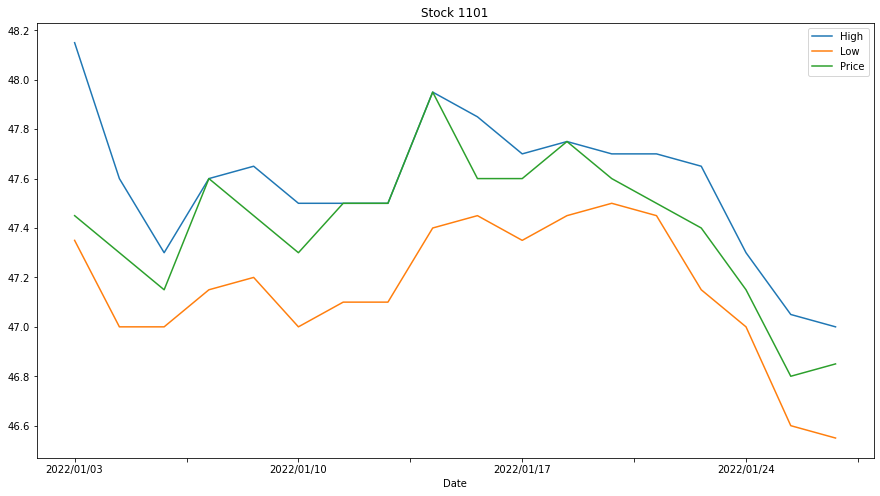

In [15]:
%matplotlib inline

df1.plot(title='Stock 1101', figsize=(15, 8))

In [ ]:
import sqlite3
import pandas as pd

connection = sqlite3.connect('各日成交資訊2.db')

df = pd.read_sql('SELECT 日期, 最高價, 最低價, 收盤價 FROM stock WHERE 日期 BETWEEN "2020/01/01" AND "2020/03/31"', connection, parse_dates=['日期'])
df.rename(columns = {'日期': 'Date', '最高價': 'High', '最低價': 'Low', '收盤價': 'Price'}, inplace=True)
df.set_index('Date', inplace=True)

%matplotlib inline
df.plot(title='Stock 1101', figsize=(15, 8))